# Linear Regression Lab

## Simple Linear Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices

In [2]:
boston_path = Path('..\\resources\\ALL CSV FILES - 2nd Edition\\Boston.csv')

boston_df = pd.read_csv(boston_path, header=0, index_col=0)

boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [4]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
linear_model = smf.ols('medv~lstat', data = boston_df).fit()

In [6]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        22:42:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [7]:
print(linear_model.params)
print('-'*10)
print(linear_model.conf_int())
print('-'*10)
print(linear_model.rsquared)
print('-'*10)
print(linear_model.rsquared_adj)
print('-'*10)
print(linear_model.mse_model)
print('-'*10)
print(linear_model.mse_resid)

Intercept    34.553841
lstat        -0.950049
dtype: float64
----------
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951
----------
0.5441462975864799
----------
0.543241825954707
----------
23243.913996693333
----------
38.63567741731436


In [8]:
linear_model.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

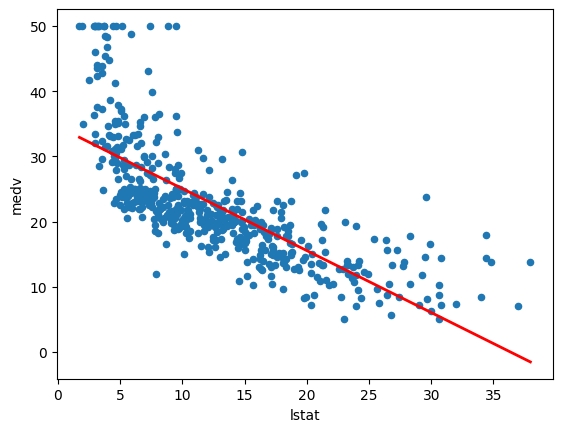

In [9]:
X_new = pd.DataFrame({'lstat': [boston_df.lstat.min(), boston_df.lstat.max()]})
preds = linear_model.predict(X_new)
boston_df.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

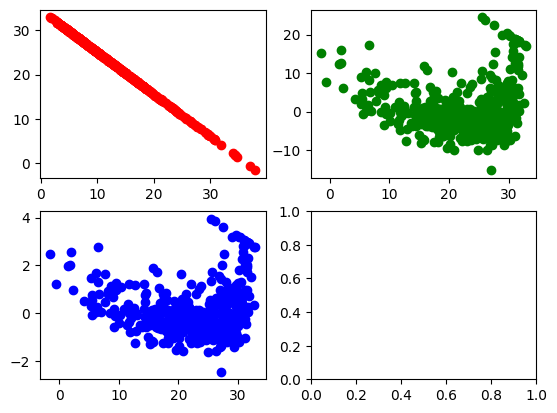

In [10]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston_df.lstat, linear_model.predict(),'ro')
ax2.plot(linear_model.predict(), linear_model.resid, 'go')
ax3.plot(linear_model.predict(), linear_model.resid_pearson, 'bo')
plt.show()

In [11]:
np.argmax(linear_model.get_influence().hat_matrix_diag)

374

## Multiple Linear Regression

In [12]:
multiple_linear_model = smf.ols('medv~lstat+age', data = boston_df).fit()

print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.98e-88
Time:                        22:42:11   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [13]:
multiple_linear_model = smf.ols('medv~lstat*age', data = boston_df).fit()

print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.86e-88
Time:                        22:42:11   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [14]:
all_columns = "+".join(boston_df.columns.difference(["medv"]))
my_formula_plus = "medv~" + all_columns
multiple_linear_model = smf.ols(my_formula_plus, data=boston_df).fit()
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          2.23e-133
Time:                        22:42:11   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

In [15]:
_, X = dmatrices(my_formula_plus, data=boston_df, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
    
print(vif_coeff)

{'Intercept': 535.5266192987414, 'age': 3.0882320397311966, 'chas': 1.0711677737584038, 'crim': 1.7674859154310125, 'dis': 3.954036641628298, 'indus': 3.9871806307570994, 'lstat': 2.8707765008417514, 'nox': 4.369092622844793, 'ptratio': 1.797059593129779, 'rad': 7.445300760069838, 'rm': 1.9125324374368873, 'tax': 9.002157663471797, 'zn': 2.2984589077358097}


## Interaction Terms

In [16]:
all_columns = "*".join(boston_df.columns.difference(["medv"]))
my_formula_product = "medv~" + all_columns
multiple_linear_model_interaction_terms = smf.ols(my_formula_product, data=boston_df).fit()
print(multiple_linear_model_interaction_terms.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     12.51
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.51e-22
Time:                        22:42:13   Log-Likelihood:                -691.46
No. Observations:                 506   AIC:                             2275.
Df Residuals:                      60   BIC:                             4160.
Df Model:                         445                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Non-linear Transformations of the Predictors

In [17]:
linear_model_order1 = smf.ols('medv~ lstat', data=boston_df).fit()
linear_model_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=boston_df).fit()

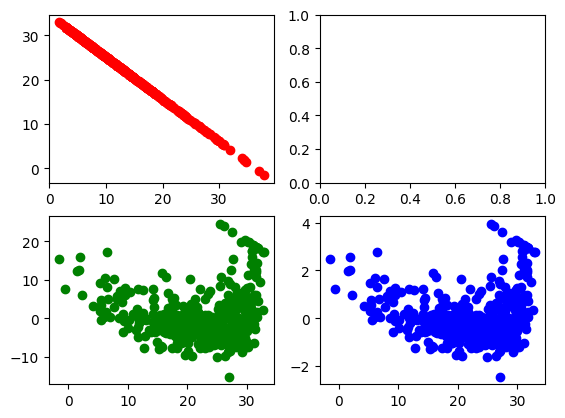

In [18]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston_df.lstat, linear_model_order1.predict(),'ro')
ax3.plot(linear_model_order1.predict(), linear_model_order1.resid, 'go')
ax4.plot(linear_model_order1.predict(), linear_model_order1.resid_pearson, 'bo')
plt.show()

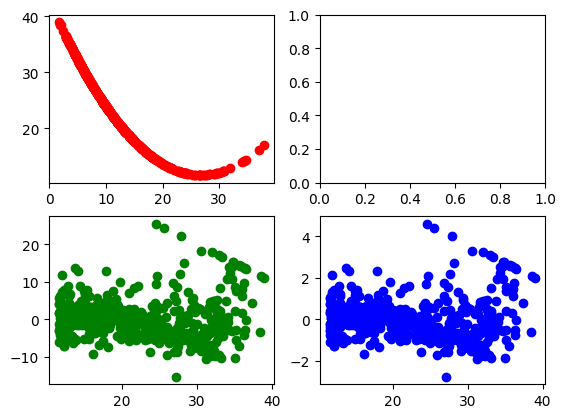

In [19]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston_df.lstat, linear_model_order2.predict(),'ro')
ax3.plot(linear_model_order2.predict(), linear_model_order2.resid, 'go')
ax4.plot(linear_model_order2.predict(), linear_model_order2.resid_pearson, 'bo')
plt.show()

In [20]:
table = sm.stats.anova_lm(linear_model_order1, linear_model_order2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


In [21]:
lm_log = smf.ols('medv~ np.log(rm)', data=boston_df).fit()
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.22e-64
Time:                        22:42:15   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

In [22]:
carseats_path = Path('..\\resources\\ALL CSV FILES - 2nd Edition\\Carseats.csv')
carseats_df = pd.read_csv(carseats_path, header=0)

In [23]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
carseats_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [25]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [26]:
linear_model_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = carseats_df).fit()
linear_model_carseats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.33e-38
Time:                        22:42:15   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      0.000      13.656      16.710
Income          0.0108      0.004      2.664      0.008       0.003       0.019
Advertising     0.1203      0.017      7.078      0.000       0.087       0.154
Price          -0.0573      0.005    -11.932      0.000      -0.067      -0.048
Age            -0.0486      0.007     -6.956      0.000      -0.062      -0.035
==============================================================================
Omnibus:                        3.285   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.336
Skew:                           0.218   Prob(JB):                        0.189
Kurtosis:                       2.903   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
ShelveLoc_dummies = pd.get_dummies(carseats_df.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]
Carseats_dummy = pd.concat([carseats_df, ShelveLoc_dummies], axis=1)
Carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0


In [28]:
linear_model_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', data = Carseats_dummy).fit()
linear_model_carseats_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          1.33e-101
Time:                        22:42:16   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545     24.575      0.000      12.329      14.473
Income               0.0136      0.003      4.891      0.000       0.008       0.019
Advertising          0.1057      0.012      9.076      0.000       0.083       0.129
Price               -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                 -0.0498      0.005    -10.401      0.000      -0.059      -0.040
ShelveLoc_Good       4.8756      0.230     21.175      0.000       4.423       5.328
ShelveLoc_Medium     2.0046      0.189     10.590      0.000       1.632       2.377
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
linear_model_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', data = carseats_df).fit()
linear_model_carseats_wo_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          1.33e-101
Time:                        22:42:16   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.4006      0.545     24.575      0.000      12.329      14.473
C(ShelveLoc)[T.Good]       4.8756      0.230     21.175      0.000       4.423       5.328
C(ShelveLoc)[T.Medium]     2.0046      0.189     10.590      0.000       1.632       2.377
Income                     0.0136      0.003      4.891      0.000       0.008       0.019
Advertising                0.1057      0.012      9.076      0.000       0.083       0.129
Price                     -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                       -0.0498      0.005    -10.401      0.000      -0.059      -0.040
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Key Issues

> ### Simple Linear Regression
> 
> Simple Linear Regression is a very straightforward approach for predicting a quantitative response *Y* on > the basis of a single predictor variable *X*. It asumes that there is approximately a linear relationship > between *X* and *Y*.

>### Multiple Linear Regression
>
>Multiple linear regression is a generalization of simple linear regression to the case of more than one >independent variable, and a special case of general linear models, restricted to one dependent variable.

>### Ordinary Least Squares (OLS)  
>
>Ordinary Least Squares is a type of linear least squares method for estimating the unknown parameters in a >linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables >by the principle of least squares: minimizing the sum of the squares of the differences between the observed >dependent variable (values of the variable being observed) in the given dataset and those predicted by the >linear function of the independent variable.

>### Variance Inflation Factor (VIF)
>
>Variance Inflation Factor is the ratio (quotient) of the variance of estimating some parameter in a model >that includes multiple other terms (parameters) by the variance of a model constructed using only one term. >It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It >provides an index that measures how much the variance (the square of the estimate's standard deviation) of >an estimated regression coefficient is increased because of collinearity. Cuthbert Daniel claims to have >invented the concept behind the variance inflation factor, but did not come up with the name